# Analiza podatkov iz hribi.net

Za projektno bom analiziral podatke iz [hribi.net](https://www.hribi.net/). Podatke sem zbral za vse države, ki so bile na voljo in za katere so bili na voljo podatki. To vključuje Slovenijo, med drugimi pa tudi Avstrijo, Italijo, Hrvaško, Grčijo in druge. Analiziral bom:

- Gore
- Poti

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 15)

gore = pd.read_csv("gore.csv", index_col="id")

Za začetek si oglejmo 15 najvišjih slovenskih vrhov.

In [87]:
slovenske_gore = gore[gore["država"].str.contains("Slovenija") & gore["vrsta"].str.contains("vrh")].copy().sort_values("višina", ascending=False)
slovenske_gore[["ime", "višina"]].head(15)

,ime,višina
id,,
101,Triglav,2864
102,Škrlatica,2740
103,Mali Triglav,2725
104,Mangart,2679
105,Visoki Rokav,2646
106,Jalovec,2645
107,Veliki Oltar,2621
108,Velika Martuljška Ponca,2602
109,Razor,2601


Seveda je Triglav najvišji, opazimo pa lahko tudi, da vsi vrhovi segajo krepko čez 2000 metrov nadmorske višine. Pojavi se nam naslednje vprašanje:

### Koliko dvatisočakov se nahaja v Sloveniji?

In [88]:
slovenski_dvatisocaki = slovenske_gore[slovenske_gore["višina"] >= 2000]
len(slovenski_dvatisocaki)

198

Imamo torej skoraj 200 dvatisočakov.

### Porazdelitev slovenskih gor po višini

Oglejmo si sedaj, koliko vrhov posameznih višin imamo. Za lažji prikaz bomo zaokrožili višino na stotice. 

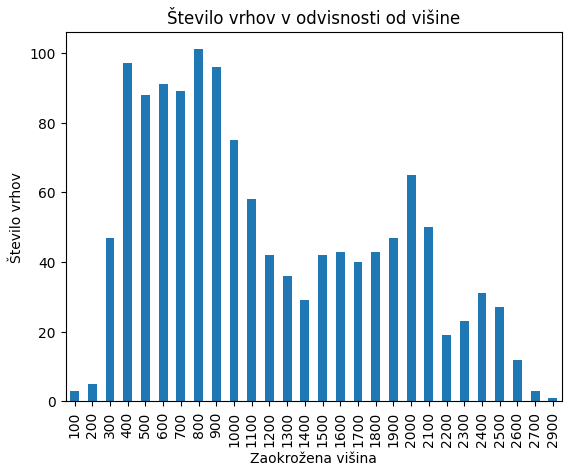

In [104]:
zaokrozena_visina = gore["višina"].round(-2)
gore["zaokrožena višina"] = zaokrozena_visina
slovenske_gore["zaokrožena višina"] = zaokrozena_visina

po_visini = slovenske_gore.groupby("zaokrožena višina").size()
graf_po_visini = po_visini.plot.bar(title="Število vrhov v odvisnosti od višine",xlabel="Zaokrožena višina", ylabel="Število vrhov")

In [166]:
pod_1000 = slovenske_gore["višina"] <= 1000
print(f" Število slovenskih vrhov pod 1000 m: {len(slovenske_gore[pod_1000])}")
print(f" Število slovenskih vrhov nad 1000 m: {len(slovenske_gore[~pod_1000])}")

 Število slovenskih vrhov pod 1000 m: 657
 Število slovenskih vrhov nad 1000 m: 646


Največ je vrhov višine 800 m, veliko je tudi vrhov med 400 m in 900 m. Zanimivo je, da število gor po 900 m višine nekaj časa vpada, potem pa zopet zraste. Imamo več vrhov, nižjih od 1000 m kot ostalih, a le za 9 (657 in 646).

### Ločitev na gorovja

Ali so katera gorovja višja od drugih? Za začetek si poglejmo povprečno višino gor v vsakem gorovju.

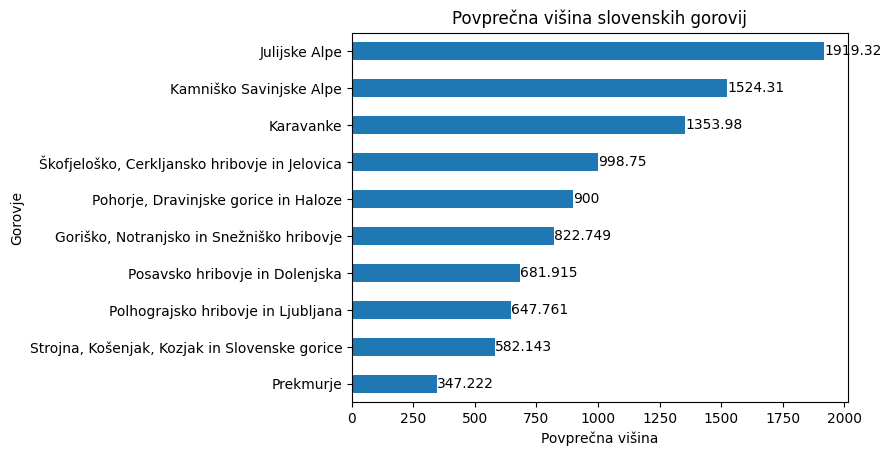

In [90]:
po_gorovju = slovenske_gore.groupby("gorovje")["zaokrožena višina"].mean()
graf_po_gorovju = po_gorovju.sort_values().plot.barh(title="Povprečna višina slovenskih gorovij", xlabel="Povprečna višina", ylabel="Gorovje")
for container in graf_po_gorovju.containers:
    graf_po_gorovju.bar_label(container)

Kot pričakovano, so Julijske Alpe na prvem mestu. Presenetljivo pa je, da je razlika med povprečno višino gore iz Julijskih Alp in gore iz Kamniško Savinjskih Alp večja, kakor je razlika med povprečno višino gore iz Karavank ter hriba iz Škofjeloškega, Cerkljanskega hribovja in Jelovice. Imamo torej večjo razliko v višini med gorami, kakor med gorami in hribi.

Primerjajmo porazdelitev vrhov glede na gorovje, v tem primeru Julijskih Alp, Karavank in Kamniško Savinjskih Alp. Ostala gorovja so bila zaradi posledične nepreglednosti grafa izpuščena.

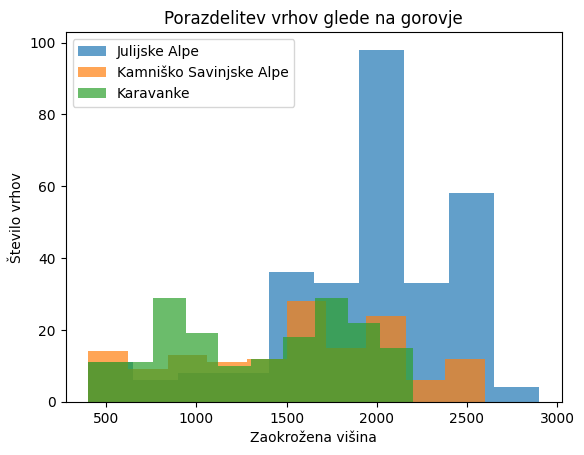

In [91]:
pogoj_za_ja_k_ksa = ((slovenske_gore["gorovje"] == "Julijske Alpe") | (slovenske_gore["gorovje"] == "Karavanke") | (slovenske_gore["gorovje"] == "Kamniško Savinjske Alpe"))
julijske_karavanke_kamnisko_savinjske_alpe = slovenske_gore[pogoj_za_ja_k_ksa]

graf_primerjava = julijske_karavanke_kamnisko_savinjske_alpe.groupby("gorovje")["zaokrožena višina"].plot.hist(
    title="Porazdelitev vrhov glede na gorovje", xlabel="Zaokrožena višina", ylabel="Število vrhov", legend=True, alpha=0.7)

Vidimo, da poleg dejstva, da je povprečni vrh iz Julijskih Alp najvišji (kar smo ugotovili že pri prejšnjem grafu), so tudi gore v Julijskih Alpah občutno višje od gor v Kamniško Savinjskih Alpah in Karavankah. Zdi se tudi, da se največ vrhov izmed teh treh gorovij nahaja v Julijskih Alpah, kar bomo pokazali v naslednjem grafu

### Kakšna je razporeditev vrhov po gorovjih?

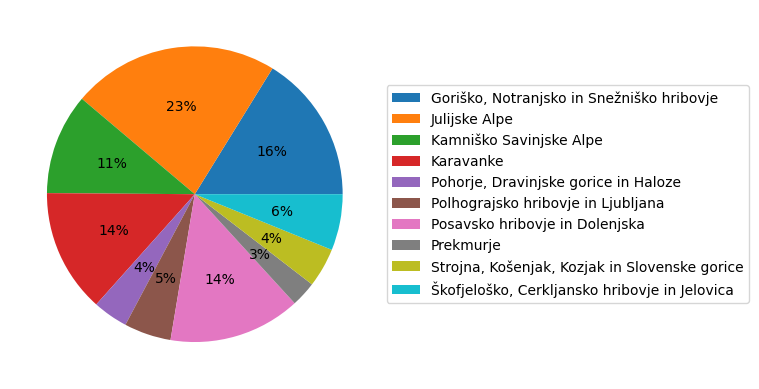

In [92]:
po_gorovju_st_vrhov = slovenske_gore.groupby("gorovje").size()
graf_po_gorovju_st_vrhov = po_gorovju_st_vrhov.plot.pie(legend=True, autopct='%1.0f%%', labels=None)
graf_po_gorovju_st_vrhov.legend(po_gorovju_st_vrhov.index, loc="center left", bbox_to_anchor=(1.0, 0.5))


Kaj pa po državah?

<Axes: xlabel='Država', ylabel='Število gor'>

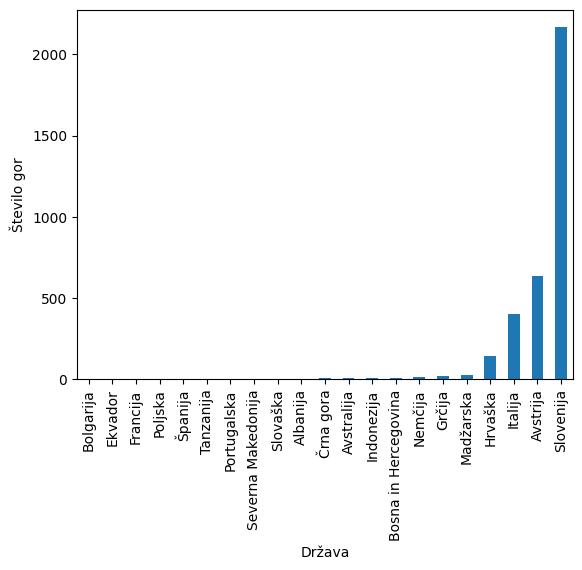

In [93]:
gore_razbito = gore.copy()
gore_razbito['država'] = gore['država'].str.split(', ')     #popravimo, ker nekatere gore vsebujejo več držav
gore_razbito = gore_razbito.explode('država')

po_drzavi_st_vrhov = gore_razbito.groupby("država").size()
po_drzavi_st_vrhov.sort_values().plot.bar(xlabel="Država", ylabel="Število gor")

Podatki so očitno osredotočeni na ozemlje okoli Slovenije.

Kot smo si že ogledali število vrhov v odvisnosti od višine, si oglejmo zdaj še enak graf za vse gore in ne le slovenske.

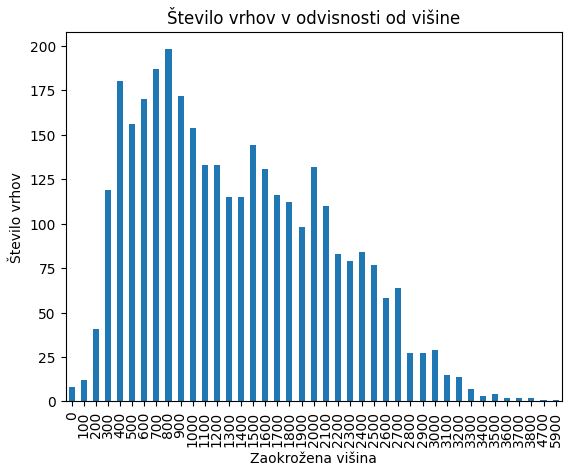

In [160]:
po_visini_vse = gore.groupby("zaokrožena višina").size()
graf_po_visini_vse = po_visini_vse.plot.bar(title="Število vrhov v odvisnosti od višine",xlabel="Zaokrožena višina", ylabel="Število vrhov")

Ker prevladujejo podatki iz Slovenije, je graf zelo podoben grafu slovenskih gor, z razliko dodanih višjih vrhov.

### Poti

Koliko označenih poti imamo v Sloveniji?

In [94]:
gore_poti = pd.read_csv("gore_poti.csv")
gore_okolica = pd.read_csv("gore_okolica.csv")

slo_gore_z_potmi = pd.merge(slovenske_gore, gore_poti, left_on="id", right_on="id")
oznacene = len(slo_gore_z_potmi[slo_gore_z_potmi["zahtevnost"].str.contains(" označena ")])
odstotek_oznacenih = round(oznacene / len(slo_gore_z_potmi) * 100, 1)
print(oznacene)
print(f"{odstotek_oznacenih} %")


3353
69.8 %


Imamo kar 3353 označenih poti, ki predstavljajo 69.7 % vseh poti.

Pojavi se nam pa še naslednje vprašanje: "Kako vsi ti podatki vplivajo na priljubljenost in število ogledov?"

### Priljubljenost

Ali je višina gore povezana s priljubljenostjo ter številom ogledov? Kaj pa zahtevnost, dolžina poti? Kaj pa okoliški razgled na druge gore? V tem razdelku bomo odgovorili na ta vprašanja. Priljubljenost se meri v odstotkih.

Oglejmo si najprej grafa priljubljenosti v odvisnoti od višine ter ogledov v odvisnosti od višine.

<Axes: title={'center': 'Priljubljenost v odvisnosti od višine'}, xlabel='višina', ylabel='priljubljenost'>

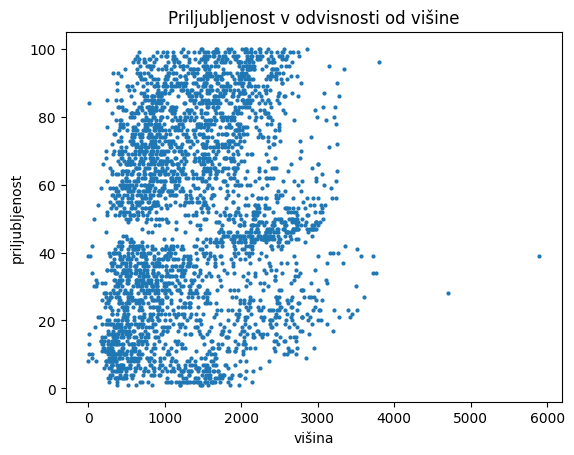

In [108]:
gore.plot.scatter(x = "višina", y="priljubljenost", title="Priljubljenost v odvisnosti od višine", s = 4)

Očitno ni nobene odvisnosti. Kaj pa število ogledov v odvisnosti od višine?

<Axes: title={'center': 'Število ogledov v odvisnosti od višine'}, xlabel='višina', ylabel='število ogledov'>

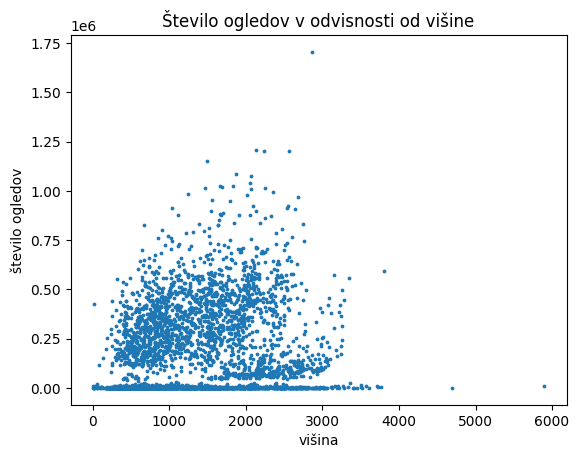

In [109]:
gore.plot.scatter(x= "višina", y="število ogledov", s = 3, title="Število ogledov v odvisnosti od višine")

Tudi tukaj ni očitno nobene povezave. Poskusimo še z dolžino poti. Morda so gore, ki imajo daljše poti manj priljubljene.

<Axes: xlabel='zaokrožen čas', ylabel='priljubljenost'>

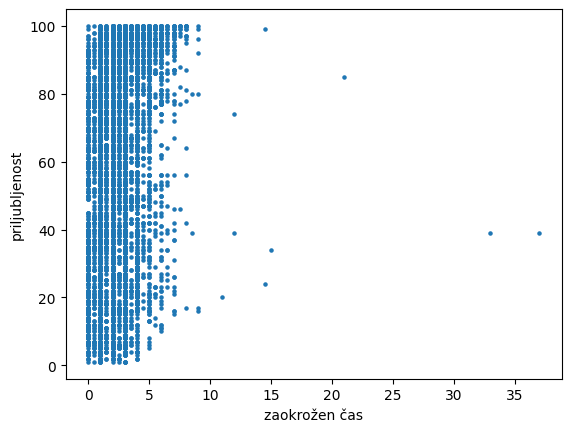

In [154]:
gore_z_potmi = pd.merge(gore, gore_poti, left_on="id", right_on="id")

def zaokrozi_cas(cas):
    ure_minute = cas.split(" ")
    if len(ure_minute) == 2 and "h" in ure_minute:      #samo ure
        return int(ure_minute[0])
    elif len(ure_minute) == 2 and "min" in ure_minute:       #samo minute
        minute = int(ure_minute[0])
        if minute < 30:
            return 0
        elif minute == 30:
            return 0.5
        else:
            return 1
    else:
        ure = int(ure_minute[0])
        minute = int(ure_minute[2])
        if minute < 30:
            return ure
        elif minute == 30:
            return ure + 0.5
        else:
            return ure + 1

gore_z_potmi["zaokrožen čas"] = gore_z_potmi["čas"].apply(zaokrozi_cas)
gore_z_potmi.plot.scatter(x = "zaokrožen čas", y="priljubljenost", s=5)

Tudi tukaj ni nobene očitne povezave.

Skoraj gotovo pa morata biti povezana priljubljenost in število ogledov. Oglejmo si torej graf priljubljenosti v odvisnosti od števila ogledov.

<Axes: title={'center': 'Priljubljenost v odvisnosti od števila ogledov'}, xlabel='število ogledov', ylabel='priljubljenost'>

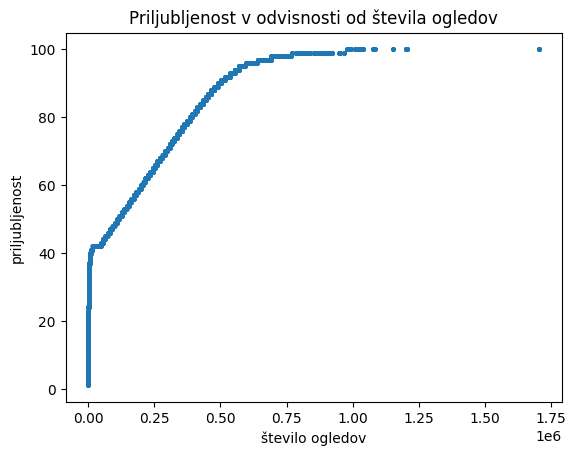

In [156]:
gore_z_potmi.plot.scatter(x = "število ogledov", y="priljubljenost", s=5, title="Priljubljenost v odvisnosti od števila ogledov")

Graf spominja na logaritemsko funkcijo. Izgleda, da je bila priljubljenost izračunana prek logaritma števila ogledov.

### Ugotovitve

Iz podatkov smo ugotovili:

- podatki so osredotočeni na Slovenijo